<a href="https://colab.research.google.com/github/srijac9/Machine-Learning-and-Data-Visualization-Course/blob/main/2023_07_17_SrijaChitturi_Project69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Feature Encoding




---

#### Getting Started:

1. Follow the next 3 steps to create a copy of this colab file and start working on the project.

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project69** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the price of diamonds on the basis of various factors such as its cut, color, clarity, depth etc.

---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Data Preparation

**Activity 3:** Feature Encoding

**Activity 4:** Train-Test Split

**Activity 5:** Model Training using `statsmodels.api`






---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Diamonds** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|carat|weight of the diamond|
|cut|quality of the cut|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y)|
|table|The width of the diamond's table expressed as a percentage of its average diameter|
|price|price in US dollars|
|x|length in mm|
|y|width in mm|
|z|depth in mm|


  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Remove the unnecessary column `Unnamed: 0` as it is of no use.



In [ ]:
# Import modules
import pandas as pd

# Load the dataset
df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv")

# Print first five rows using head() function
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Drop 'Unnamed: 0' column
df = df.drop('Unnamed: 0',axis=1)

---

#### Activity 2: Data Preparation

Extract numerical attributes from the dataset and create a heatmap to identify correlation among various numerical attributes.

In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
num_df = df.select_dtypes(include = ['float','int'])

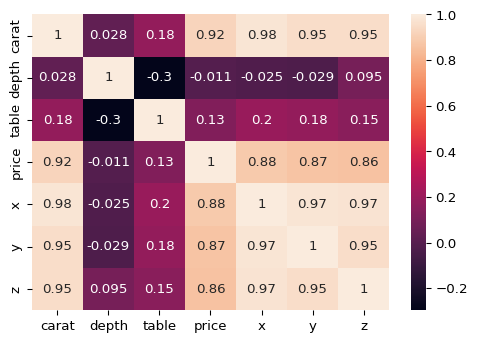

In [ ]:
# Draw a correlation heatmap between the numeric features.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4), dpi = 96)
sns.heatmap(data=num_df.corr(),annot=True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:** carat, x, y, x

**Q:** Is there multicollinearity in the dataset?

**A:** yes



---

#### Activity 3: Feature Encoding

The dataset contains certain columns that are categorical. However for linear regression, we need all numerical variables. Perform **one-hot encoding** to obtain numeric values from non-numeric categorical values.


In [ ]:
# Create a new dataframe having dummy variables for all the categorical type columns of the dataset using 'get_dummies()' function.
dummies_df = pd.get_dummies(df, drop_first = True, dtype = int)
dummies_df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# Print the information of the new dataframe obtained after one-hot encoding
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  int64  
 8   cut_Ideal      53940 non-null  int64  
 9   cut_Premium    53940 non-null  int64  
 10  cut_Very Good  53940 non-null  int64  
 11  color_E        53940 non-null  int64  
 12  color_F        53940 non-null  int64  
 13  color_G        53940 non-null  int64  
 14  color_H        53940 non-null  int64  
 15  color_I        53940 non-null  int64  
 16  color_J        53940 non-null  int64  
 17  clarity_IF     53940 non-null  int64  
 18  clarit

----

#### Activity 4: Train-Test Split

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set and keep the `price` as the target variables.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dummies_df, test_size = 0.3, random_state = 42)

In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(dummies_df.columns)
features.remove('price')

x_train = train_df[features]
y_train = train_df['price']
x_test = test_df[features]
y_test = test_df['price']

---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
# Print the summary of the linear regression report.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:53:36   Log-Likelihood:            -3.1921e+05
No. Observations:               37758   AIC:                         6.385e+05
Df Residuals:                   37734   BIC:                         6.387e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2041.2863    485.025      4.209      0.000    1090.624    2991.948
carat          1.123e+04     58.145    193.073      0.000    1.11e+04    1.13e+04
depth           -63.1199      5.320    -11.865      0.000     -73.547     -52.693
table           -27.0961      3.511     -7.719      0.000     -33.977     -20.215
x              -980.5492     37.133    -26.407      0.000   -1053.330    -907.768
y                -5.6332     21.913     -0.257      0.797     -48.582      37.316
z               -48.1548     34.465     -1.397      0.162    -115.707      19.397
cut_Good        595.5211     40.382     14.747      0.000     516.371     674.671
cut_Ideal       846.1963     40.092     21.106      0.000     767.614     924.778
cut_Premium     777.7700     38.658     20.119      0.000     702.000     853.540
cut_Very Good   743.3014     38.691     19.211      0.000     667.466     819.136
color_E        -217.0290     21.542    -10.075      0.000    -259.253    -174.805
color_F        -273.3040     21.754    -12.563      0.000    -315.942    -230.666
color_G        -500.1602     21.358    -23.418      0.000    -542.023    -458.298
color_H        -998.6347     22.635    -44.119      0.000   -1043.000    -954.270
color_I       -1476.0842     25.496    -57.895      0.000   -1526.057   -1426.112
color_J       -2381.9898     31.403    -75.852      0.000   -2443.541   -2320.439
clarity_IF     5459.0373     61.606     88.612      0.000    5338.288    5579.787
clarity_SI1    3751.7097     52.717     71.167      0.000    3648.383    3855.037
clarity_SI2    2781.9405     52.977     52.512      0.000    2678.104    2885.777
clarity_VS1    4657.8343     53.830     86.529      0.000    4552.326    4763.342
clarity_VS2    4336.7256     53.003     81.820      0.000    4232.838    4440.613
clarity_VVS1   5101.3352     56.918     89.625      0.000    4989.774    5212.897
clarity_VVS2   5028.2955     55.411     90.746      0.000    4919.689    5136.902
==============================================================================
Omnibus:                     9838.120   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           384883.734
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      18.604   Cond. No.                     7.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""




**Q:** What is the Adjusted $R^2$ value?

**A:** 0.920




---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project69**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project69** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---